/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


✅ Model training and forecasting completed!


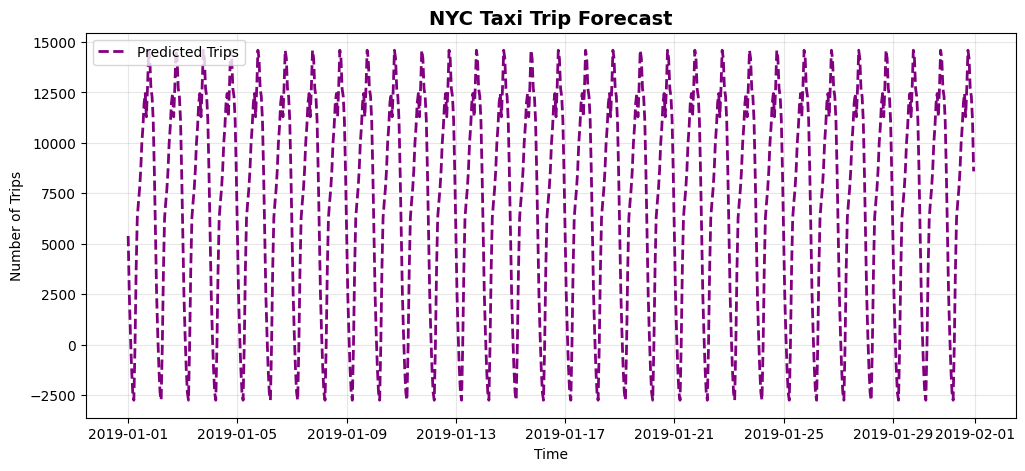

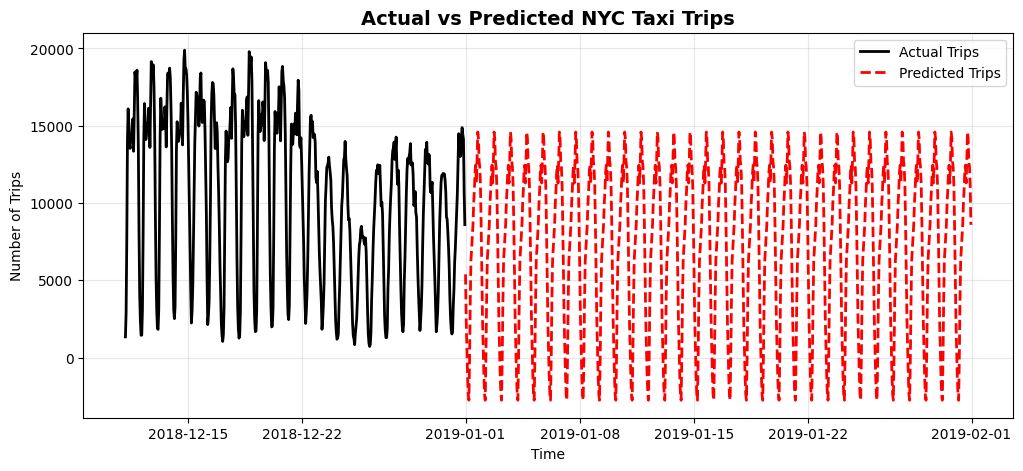

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import pickle
import matplotlib.pyplot as plt

# Load training data
train_url = "https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv"
train_data = pd.read_csv(train_url)

# Convert Timestamp to datetime format and set as index
train_data["Timestamp"] = pd.to_datetime(train_data["Timestamp"])
train_data.set_index("Timestamp", inplace=True)
train_data = train_data.asfreq('h')

# Select the dependent variable
y_train = train_data["trips"]

# Train Exponential Smoothing model
model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=24)
modelFit = model.fit()

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(modelFit, f)

# Load test data
test_url = "https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_test.csv"
test_data = pd.read_csv(test_url)

# Convert Timestamp to datetime format and set as index
test_data["Timestamp"] = pd.to_datetime(test_data["Timestamp"])
test_data.set_index("Timestamp", inplace=True)
test_data = test_data.asfreq('h')

# Forecast next 744 hours
pred = modelFit.forecast(steps=744)

# Save predictions
pred.to_csv("predictions.csv")

print("✅ Model training and forecasting completed!")

# Load predictions
pred = pd.read_csv("predictions.csv", index_col=0)
pred.index = pd.to_datetime(pred.index)

# Forecast plot
plt.figure(figsize=(12, 5))
plt.plot(pred, label="Predicted Trips", color='purple', linestyle="--", linewidth=2)
plt.title("NYC Taxi Trip Forecast", fontsize=14, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Actual vs Forecasted plot
plt.figure(figsize=(12, 5))
plt.plot(y_train[-500:], label="Actual Trips", color='black', linewidth=2)
plt.plot(pred, label="Predicted Trips", color='red', linestyle="--", linewidth=2)
plt.title("Actual vs Predicted NYC Taxi Trips", fontsize=14, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

